# BC DETECTION PROJECT

**Attribute Information:**

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)
* Malignant==> Cancerous

* Benign==> Not Cancerous (Healthy)

**Background**

All of our bodies are composed of cells. The human body has about 100 trillion cells within it. And usually those cells behave in a certain way. However, occasionally, one of these 100 trillion cells, behave in a different way and keeps dividing and pushes the other cells around it out of the way. That cell stops observing the rules of the tissue within which it is located and begins to move out of its normal position and starts invading into the tissues around it and sometimes entering the bloodstream and becoming is called a metastasis.

In summary, as we grow older,throughout a lifetime, we go through this knid of situation where a particular kind of gene is mutated where the protein that it makes is abnormal and drives the cell to behave in a different way that we call cancer.

In [1]:
from pyforest import*

In [2]:
df = pd.read_csv('breastCancer.csv')

<IPython.core.display.Javascript object>

In [3]:
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.shape

(699, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.drop('id', axis=1, inplace = True)

In [25]:
df['bare_nucleoli'].replace('?',np.nan,inplace=True)

<IPython.core.display.Javascript object>

In [30]:
df['bare_nucleoli'].fillna(df['bare_nucleoli'].median(),inplace = True)

In [31]:
df.isna().sum()

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [41]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [42]:
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [43]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## DATA EXPLORATORY ANALYSIS

In [44]:
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### BIVARAIATE DATA ANALYSIS

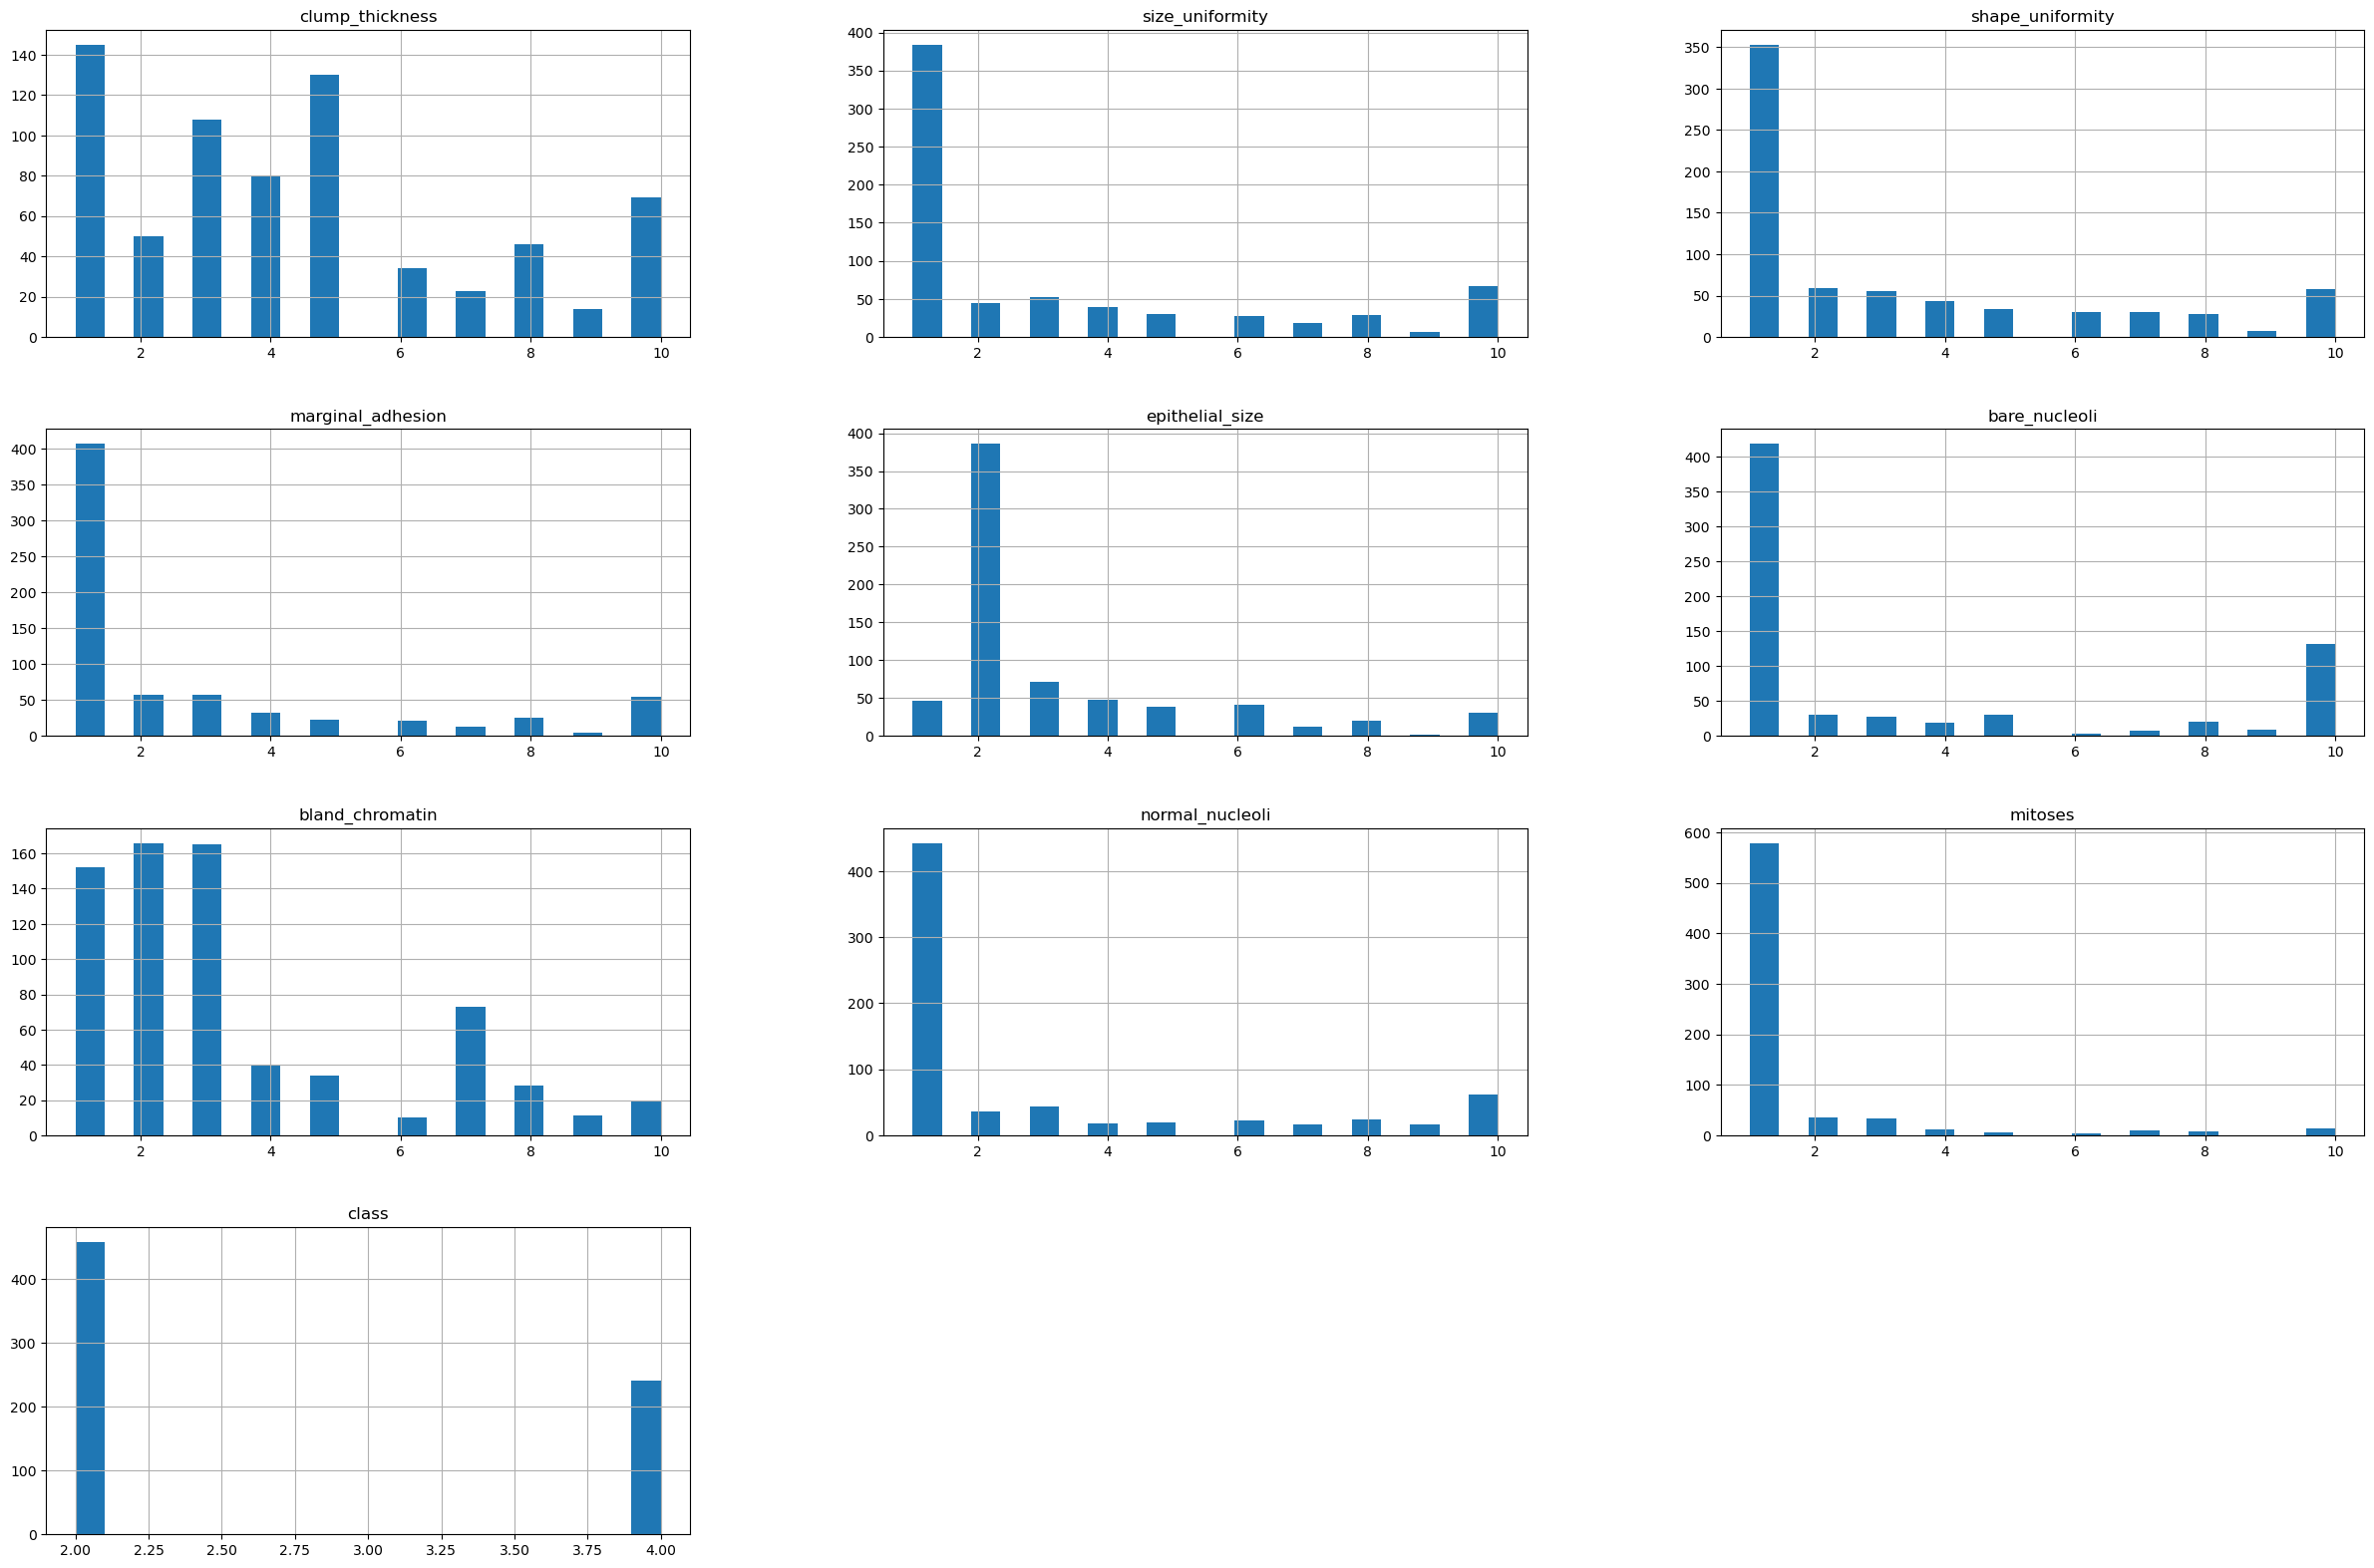

In [64]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

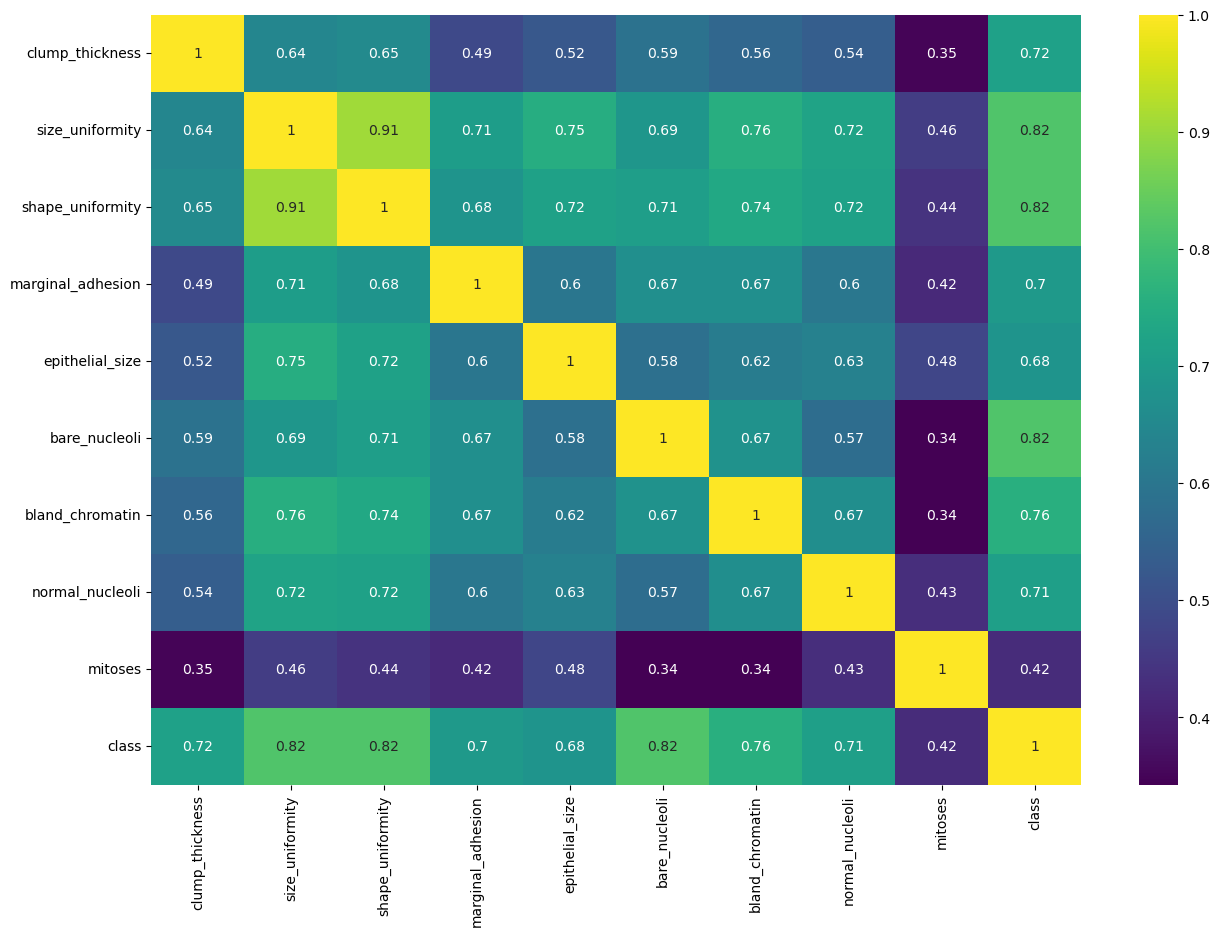

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [53]:
df.columns[1]

'size_uniformity'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

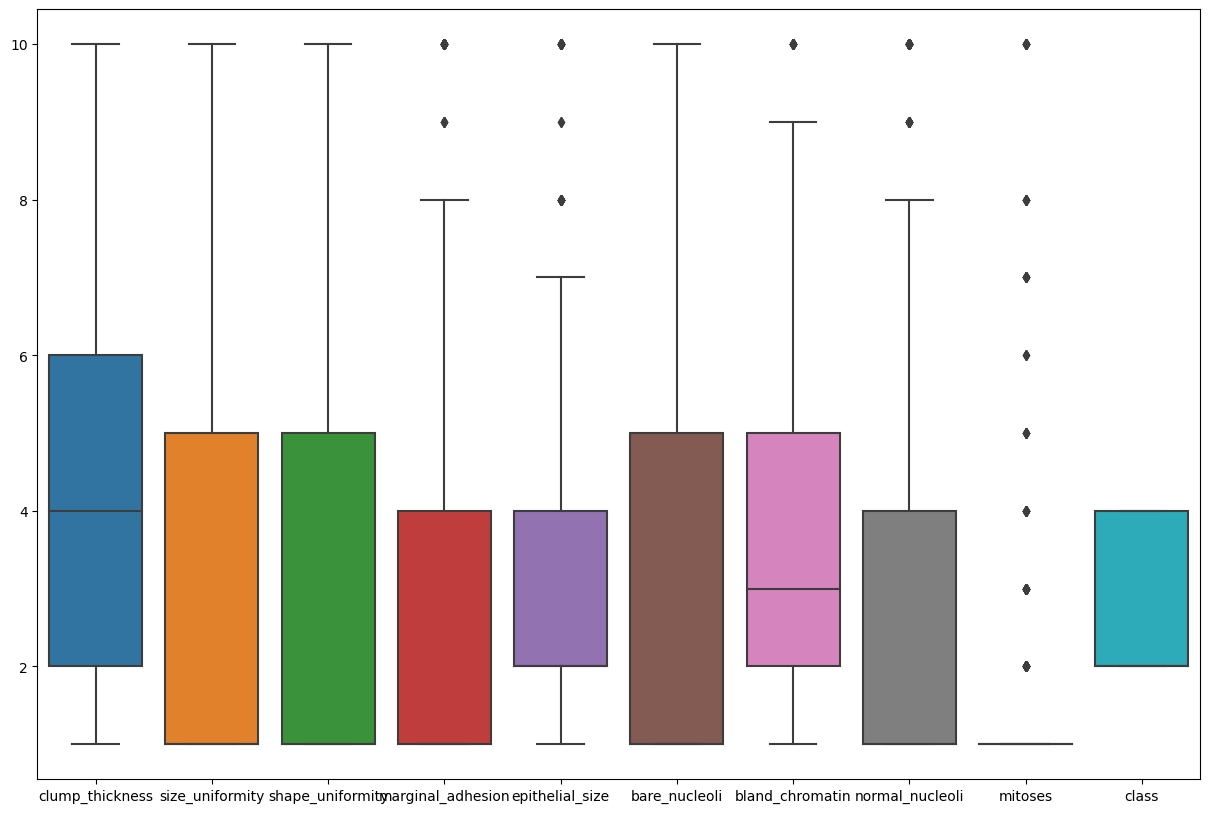

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

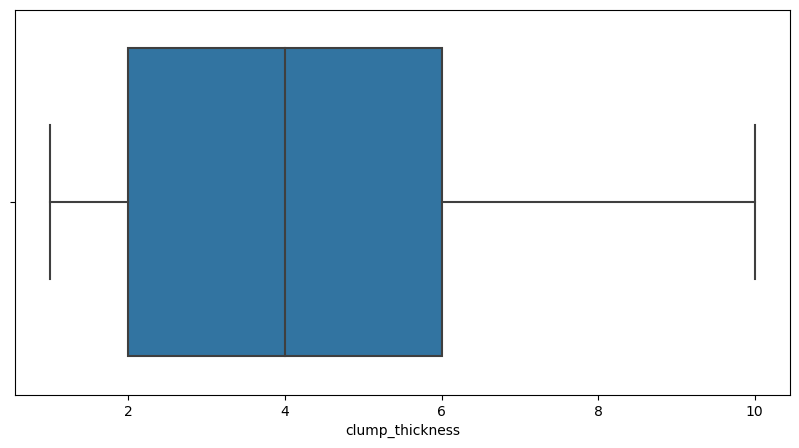

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

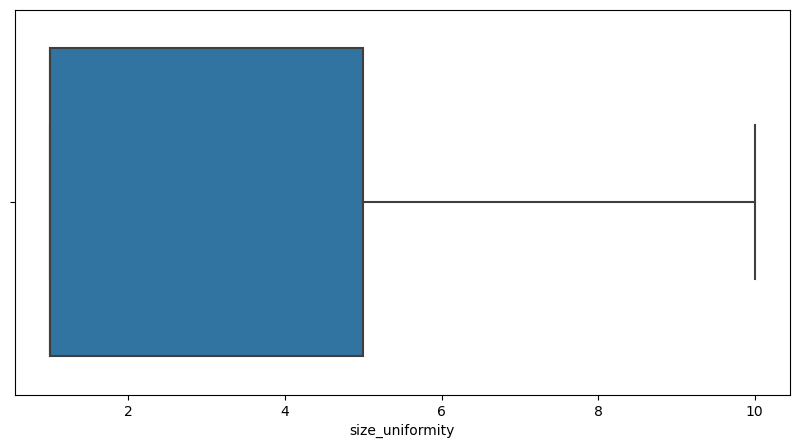

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

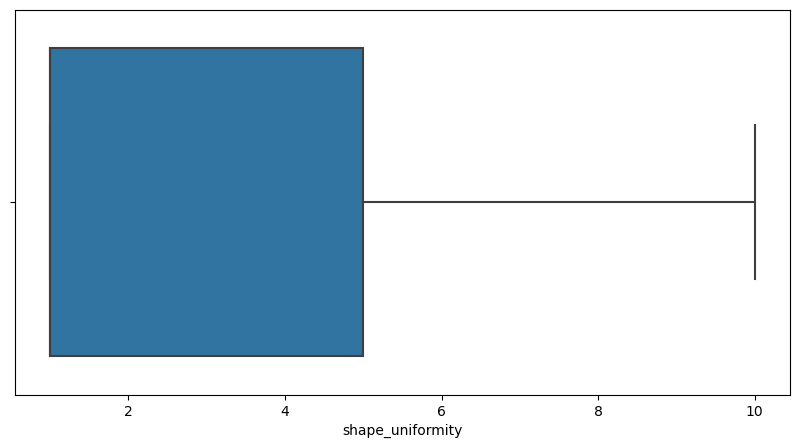

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

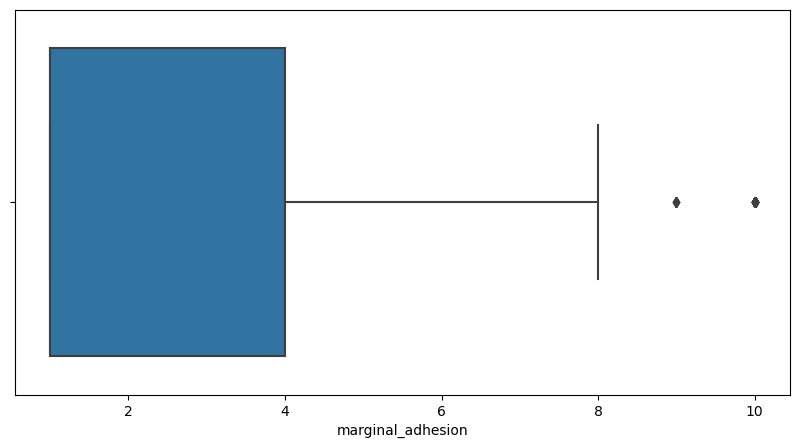

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

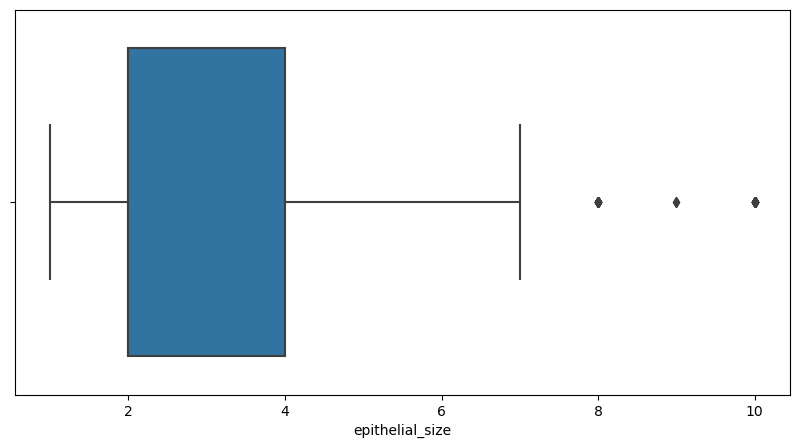

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

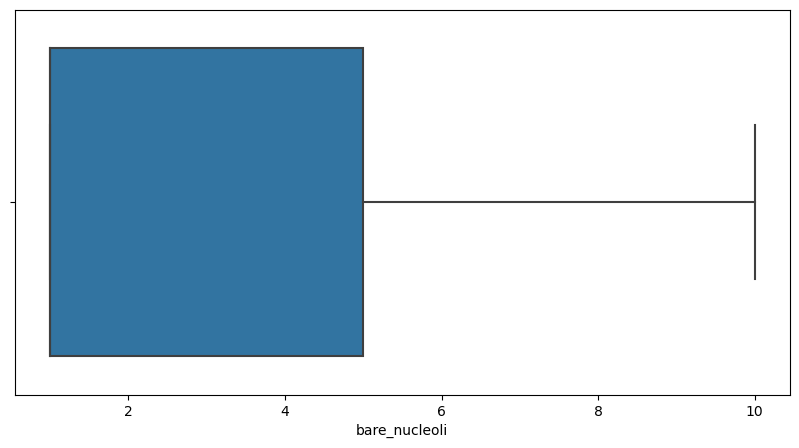

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

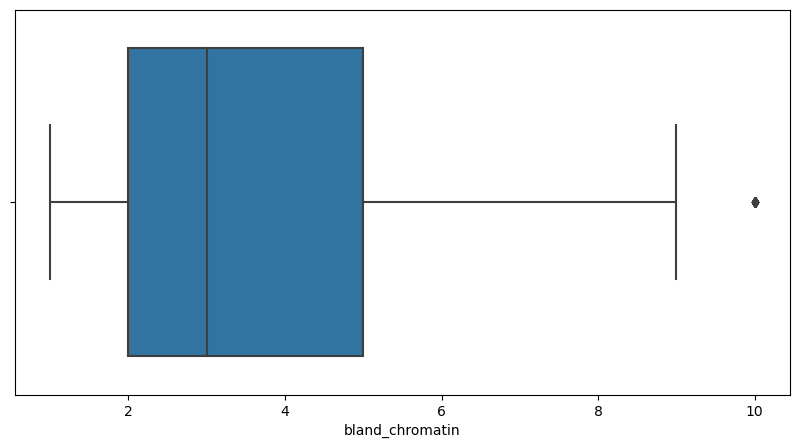

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

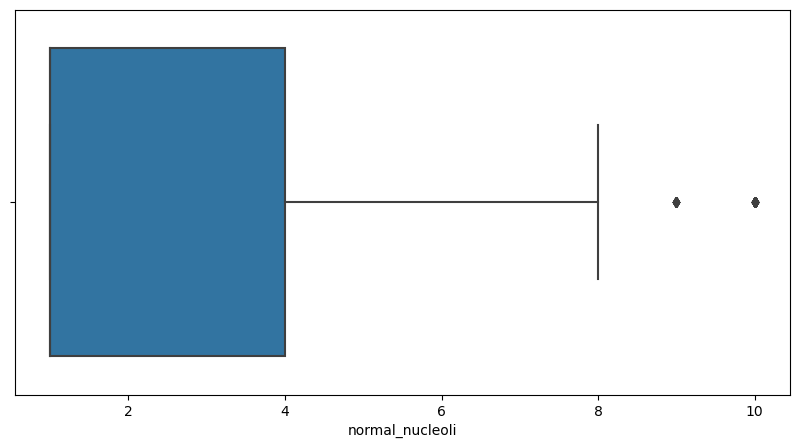

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

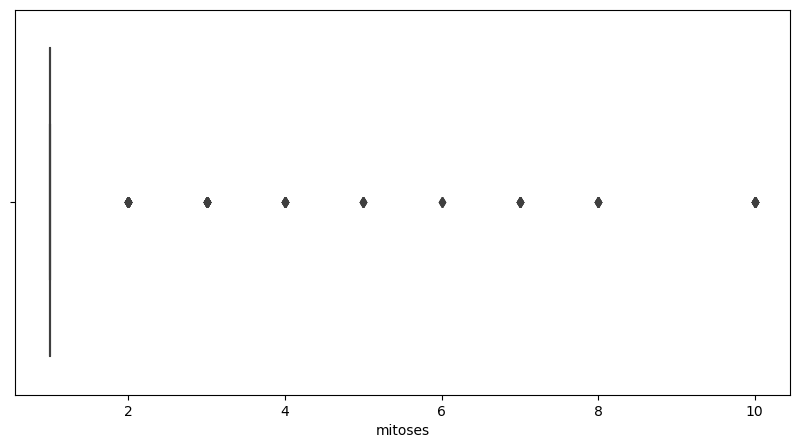

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

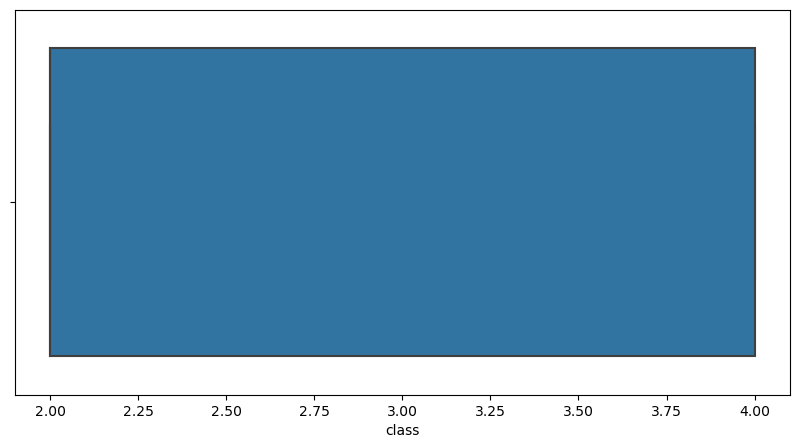

In [56]:
for i in range(len(df.columns)):
    plt.figure(figsize=(10,5))
    sns.boxplot(df,x=df.columns[i])
    plt.show()

### BUILDING THE MODEL

In [66]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [67]:
x = df.drop('class',axis = 1)
y = df['class']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
def df_score(model):
    print(f"Test Score: {round(model.score(x_test,y_test)*100,2)}")
    

#### KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Fit the model
model_knn.fit(x_train,y_train)

# Evaluate the model
df_score(model_knn)

Test Score: 98.57


In [80]:
knn_pred = model_knn.predict(x_test)
knn_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2], dtype=int64)

In [112]:
accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {round(accuracy*100,2)}%")

Accuracy: 98.57%


In [83]:
from sklearn.metrics import confusion_matrix

In [95]:
def conf(preds):
    cm = metrics.confusion_matrix(y_test,preds,labels=[2,4])

    df_cm = pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predicted M', 'Predicted B']])

    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm,annot=True);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

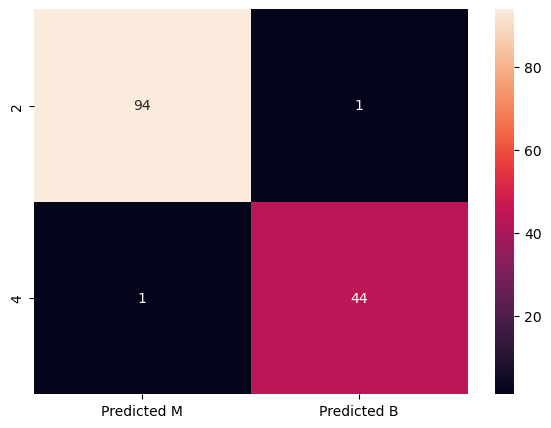

In [96]:
conf(knn_pred)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



## SUPPORT VECTOR MACHINE

In [98]:
from sklearn.svm import SVC

In [100]:
# Create the model
model_svc = SVC(gamma=0.025, C=3)

# Fit the model
model_svc.fit(x_train,y_train)

# score the model
df_score(model_svc)

Test Score: 94.29


In [102]:
svc_pred = model_svc.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

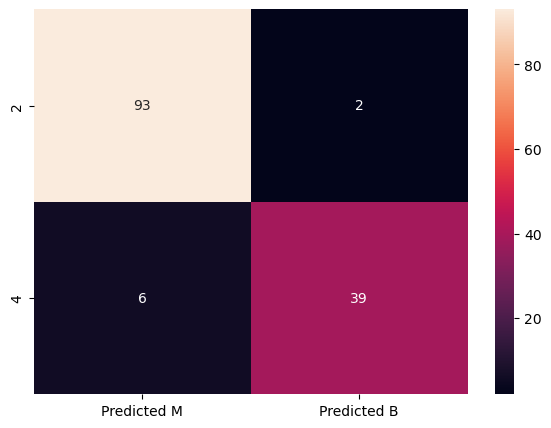

In [103]:
conf(svc_pred)

In [107]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'probability': [False, True]
}

# Create an SVC classifier
svc = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the SVC with the best parameters on the entire training set
best_svc = SVC(**best_params)
best_svc.fit(x_train, y_train)

# Evaluate the best SVC on the testing set
y_pred = best_svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'linear', 'probability': False}
Best Score: 0.9659588159588159
Accuracy: 0.9642857142857143


In [108]:
model_svc2 = SVC(C =0.1, class_weight = 'balanced', gamma=0.1, kernel = 'linear', probability = False)

model_svc2.fit(x_train,y_train)

df_score(model_svc2)

Test Score: 96.43


In [114]:
svc2_pred = model_svc2.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

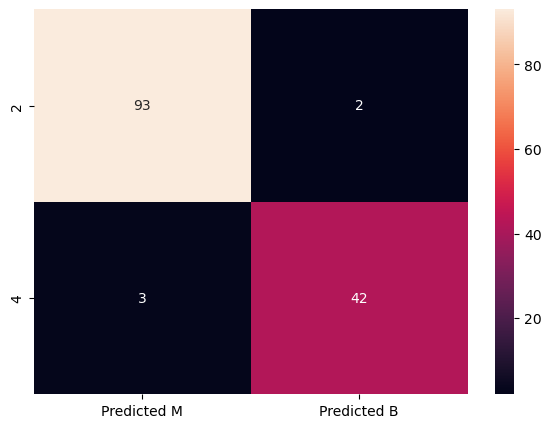

In [115]:
conf(svc2_pred)

In [122]:
knnpred = pd.DataFrame(knn_pred)
svcpred = pd.DataFrame(svc2_pred)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
df1 = pd.concat([knnpred,svcpred],axis=1)
df1.columns=[['knn preds','svc preds']]
df1.head(20)

<IPython.core.display.Javascript object>

,knn preds,svc preds
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
5,2,2
6,2,2
7,4,4
8,4,4
9,4,2


In [128]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140



In [129]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96        95
           4       0.95      0.87      0.91        45

    accuracy                           0.94       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



In [130]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96        95
           4       0.95      0.87      0.91        45

    accuracy                           0.94       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



In [131]:
df1['Class'].value_counts()

(Class,)
2           458
4           241
dtype: int64

In [133]:
df1['knn preds'].value_counts()

(knn preds,)
2.0             95
4.0             45
dtype: int64

In [134]:
df1['svc preds'].value_counts()

(svc preds,)
2.0             96
4.0             44
dtype: int64